# 图像分类数据集
`MNIST`数据集是图像分类中广泛使用的数据集之一，但是作为基准数据集过于简单。本课程使用`Fashion-MNIST`数据集。

In [2]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display() # 显示图片

通过框架中的内置函数将`Fashion-MNIST`数据集下载并且读取到内存中。

In [3]:
# 通过ToTensor实例将图像数据转换为32位浮点数格式
# 规格化：像素除以255
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root='./data/',train=True,transform=trans,download=True)
mnist_test = torchvision.datasets.FashionMNIST(root='./data/',train=False,transform=trans,download=True)

len(mnist_test),len(mnist_train)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



(10000, 60000)

In [4]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

两个可视化数据集的函数

In [5]:
def get_fashion_mnist_labels(labels):
    '''返回Fashion-MNIST数据集的文本标签'''
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]
def show_images(imgs,num_rows,num_cols,titles=None,scale=1.5): # 绘制图像
    """plot a list of images"""
    figsize = (num_cols * scale, num_rows * scale)
    _,axes = d2l.plt.subplots(num_rows,num_cols,figsize = figsize)
    axes = axes.flatten() # axes是一个坐标轴对象
    for i,(ax,img) in enumerate(zip(axes,imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            ax.imshow(img)

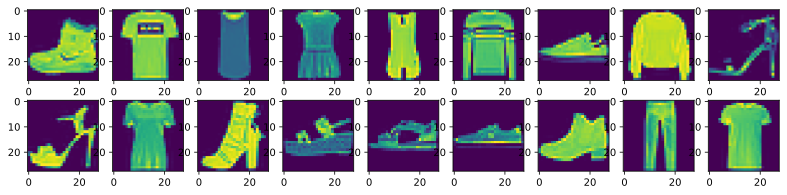

In [8]:
X,y = next(iter(data.DataLoader(mnist_train,batch_size=18)))
show_images(X.reshape(18,28,28),2,9,titles=get_fashion_mnist_labels) # 显示图片

读取一小批数据，大小为`batch_size`。

In [12]:
batch_size = 256
def get_dataloader_workers():
    '''使用4个进程来读取的数据'''
    return 4

# 随机从训练集中得到一批数据 计算时间
train_iter = data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_workers())

timer = d2l.Timer()
for X,y in train_iter:
    continue
f'{timer.stop():.2f} sec'

/opt/anaconda3/envs/cs224n/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/opt/anaconda3/envs/cs224n/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <9B280146-BBD7-3F77-9873-F9740F2A5329> /opt/anaconda3/envs/cs224n/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <F2FE5CF8-5B5B-3FAD-ADF8-C77D90F49FC9> /opt/anaconda3/envs/cs224n/lib/python3.10/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/opt/anaconda3/envs/cs224n/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/opt/anaconda3/envs/cs224

'1.71 sec'

定义`load_data_fashion_mnist`函数

In [13]:
def load_data_fashion_mnist(batch_size,resize=None):
    """下载Fashion-MNIST数据集，然后将其加载到内存中。"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root='./data/',train=True,transform=trans,download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root='./data/',train=False,transform=trans,download=True)
    return (data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_workers()),data.DataLoader(mnist_test,batch_size,shuffle=True,num_workers=get_dataloader_workers()))